In [ ]:
# Diagram as Code
https://diagrams.mingrammer.com/
https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224


In [6]:
# load diagram
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

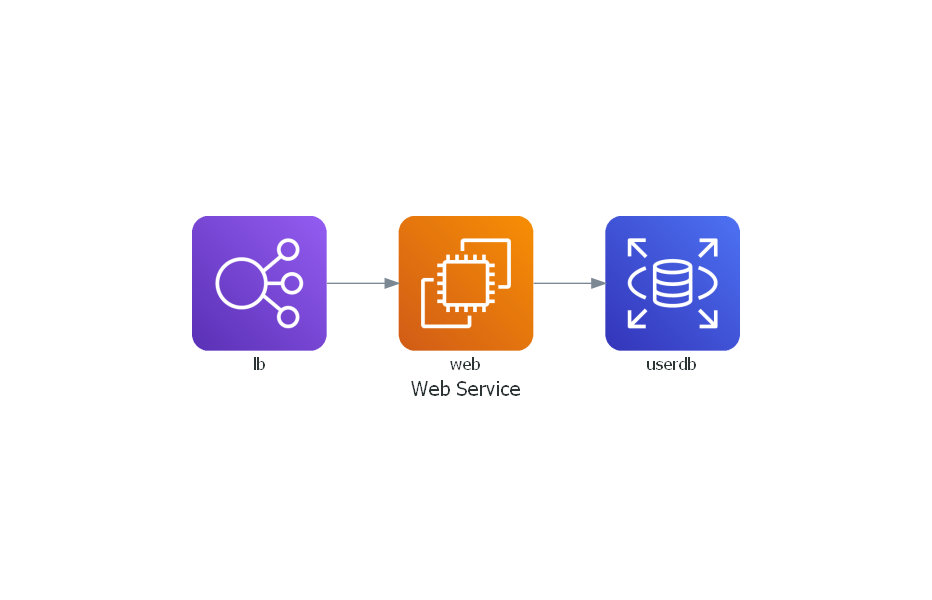

In [5]:
# simple diagram

with Diagram("Web Service", show=False) as diag:
    ELB("lb") >> EC2("web") >> RDS("userdb")
diag

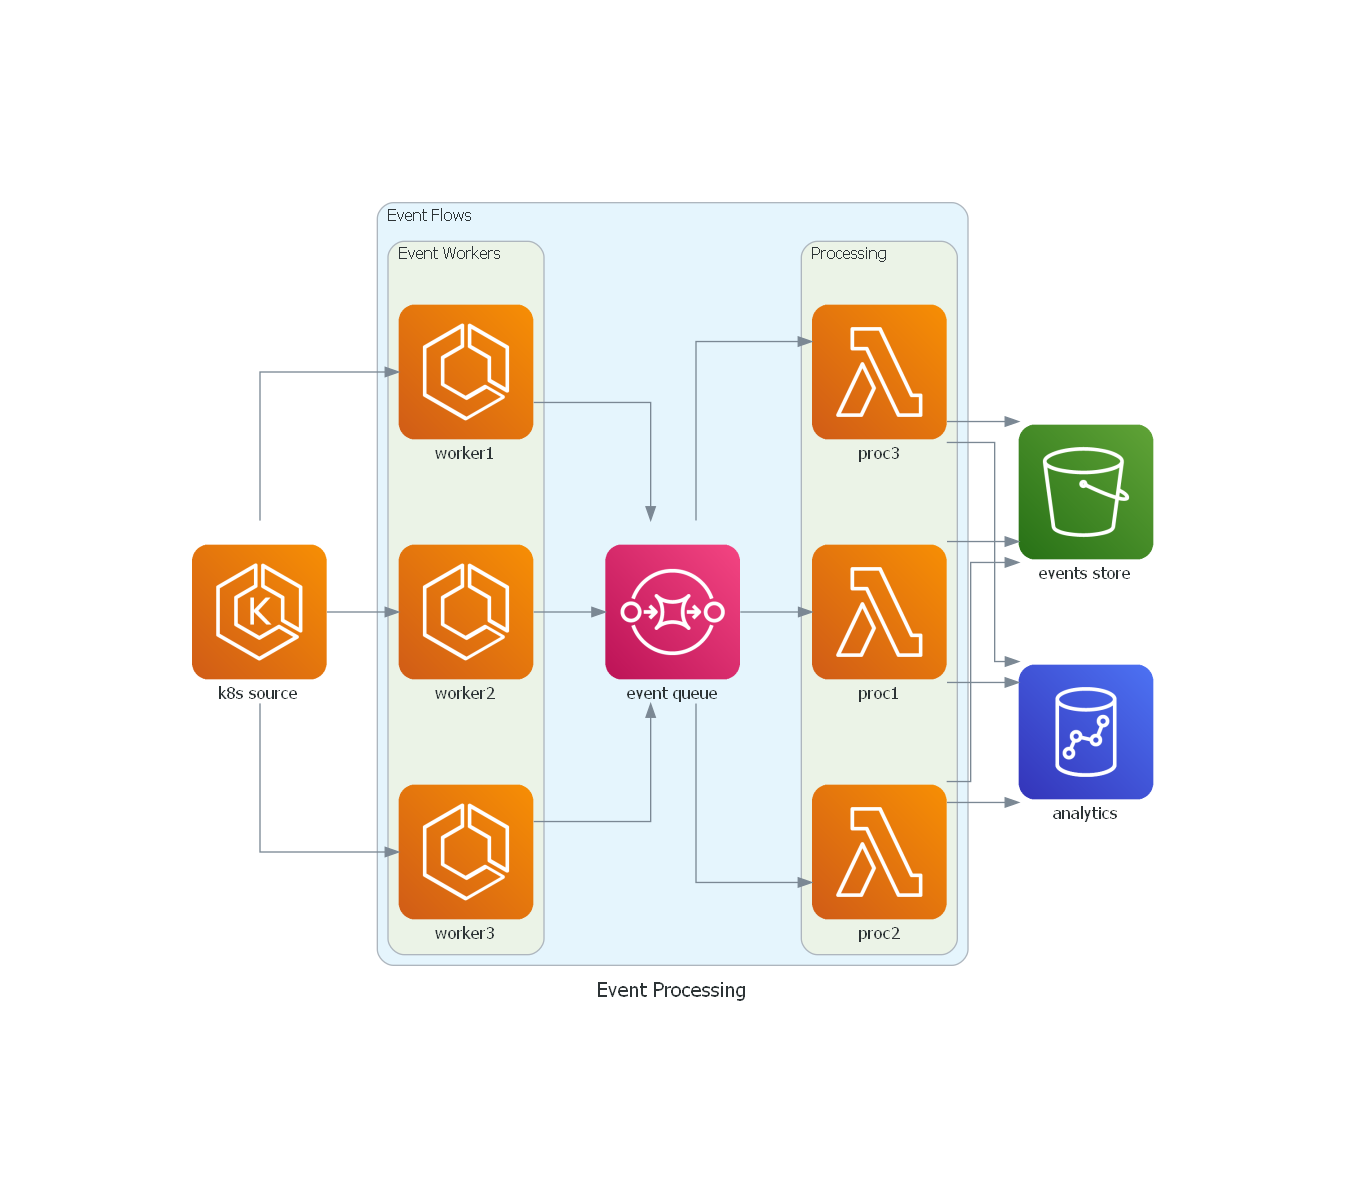

In [8]:
# Event Processing on AWS

from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False) as daig2:
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

daig2